In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
# import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

# import planckStyle
import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains, plot_lines, plot_dkl

# matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
dir_name = '/home/isidro/Documents/github/SN_lsst_analysis/chains_cov/'

## LCDM

<Figure size 720x648 with 0 Axes>

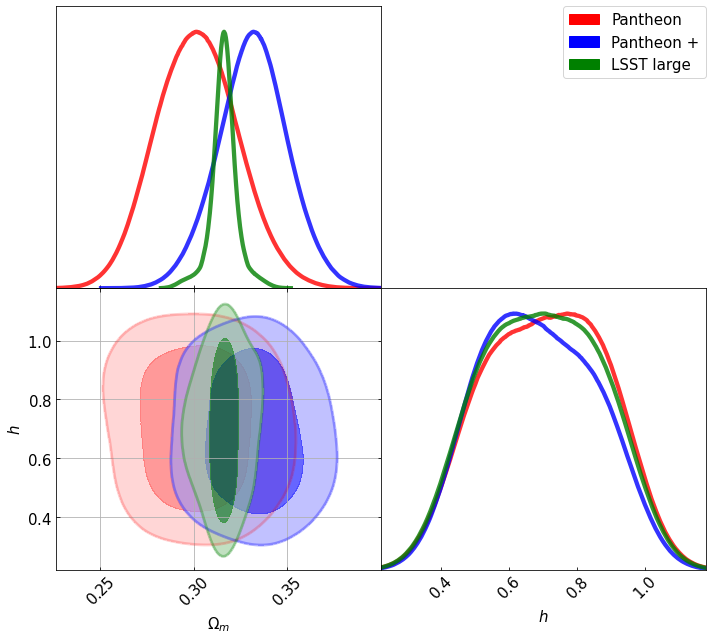

In [33]:
roots_lcdm = ['LCDM_phy_Pantheon_nested_multi',
             'LCDM_phy_PantheonPlus_nested_multi',
             'LCDM_phy_SNlsstLarge_nested_multi',
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.7,
                                             'smooth_scale_1D': 0.7, 
                                             'ignore_rows': 0.2})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots_lcdm, ['Om','h'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple', 'orange'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple', 'orange'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Pantheon',
                               'Pantheon +',
                               'LSST large'
#                                'LSST photo',
#                                'LSST spec'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
# g.subplots[2,0].grid(True)
# g.subplots[2,1].grid(True)
# g.subplots[3,0].grid(True)
# g.subplots[3,1].grid(True)
# g.subplots[3,2].grid(True)
# g.subplots[4,0].grid(True)
# g.subplots[4,1].grid(True)
# g.subplots[4,2].grid(True)
# g.subplots[4,3].grid(True)


# g.add_text('$\Lambda CDM$', x= 0.2, y=1.9, fontsize=18)
# plt.title('LCDM')
plt.savefig("lcdm_LSST_corner.png", dpi=100)

In [13]:
datasets_names = ['Pantheon', 'Pantheon Plus', 'LSST']
for idx, root in enumerate(roots_lcdm):
    print(datasets_names[idx])
    mc_samp = mcsamples.loadMCSamples(dir_name + root, settings={'ignore_rows':0.2})
    mcsamplefile = mc_samp
    mcstats = mcsamplefile.getLikeStats()
    summary = mcstats.likeSummary()
    print(summary)
    print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))
    
    p = mcsamplefile.getParams()
#     print('mean, err = ', mcsamplefile.mean(p.ggama), mcsamplefile.std(p.ggama))
#     print('95% limits: ',mcsamplefile.twoTailLimits(p.ggama, 0.95))
    print(mcsamplefile.likeStats)
    print("--"*10)
    print("--"*10)

Pantheon
Best fit sample -log(Like) = 512.491647
Ln(mean 1/like) = 514.041435
mean(-Ln(like)) = 513.453301
-Ln(mean like)  = 513.184880

-2loglike: 1024.9833
Best fit sample -log(Like) = 512.491647
Ln(mean 1/like) = 514.041435
mean(-Ln(like)) = 513.453301
-Ln(mean like)  = 513.184880

parameter       bestfit        lower1         upper1         lower2         upper2
Om              2.9954342E-01  3.3183779E-01 -5.0000000E-02  3.5163152E-01  0.0000000E+00   \Omega_m
Obh2            2.2016320E-02  2.2614560E-02 2.8804067E-316  2.3107810E-02  0.0000000E+00   \Omega_{b}h^2
h               4.2503799E-01  9.9974570E-01 4.6141257E-316  9.9974570E-01  0.0000000E+00   h
Pantheon_like  -5.1249158E+02 -5.1249155E+02 2.9718673E-316 -5.1249155E+02  0.0000000E+00   Pantheon
theory_prior   -5.5754563E-04 -6.5021191E-07 2.9528485E-316 -6.5021191E-07  0.0000000E+00   None

--------------------
--------------------
Pantheon Plus
Best fit sample -log(Like) = 701.556239
Ln(mean 1/like) = 703.390600
mean(-

## CPL

<Figure size 720x648 with 0 Axes>

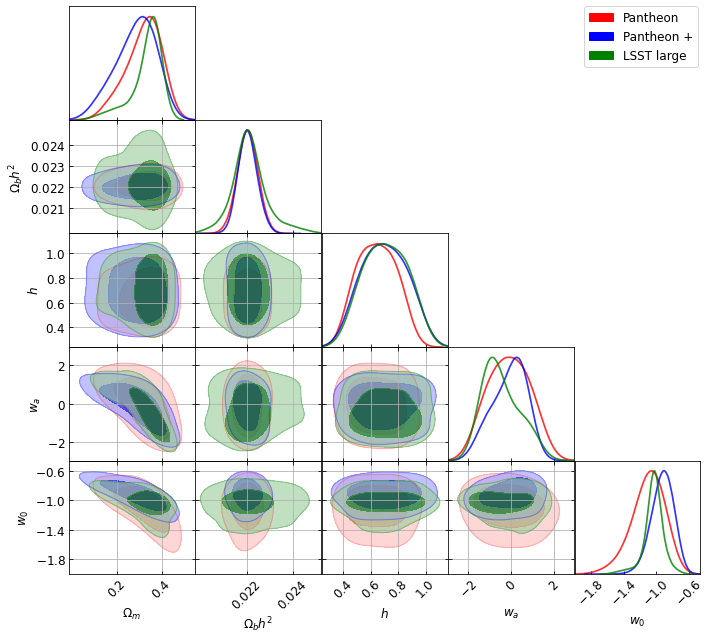

In [34]:
roots_cpl = [ 'waCDM_phy_Pantheon_nested_multi',
              'waCDM_phy_PantheonPlus_nested_multi',
              'waCDM_phy_SNlsstLarge_nested_multi',
             ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.7,
                                             'smooth_scale_1D': 0.7, 
                                             'ignore_rows': 0.2})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots_cpl, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple', 'orange'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple', 'orange'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Pantheon',
                               'Pantheon +',
                               'LSST large'
#                                'LSST photo',
#                                'LSST spec'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
g.subplots[3,0].grid(True)
g.subplots[3,1].grid(True)
g.subplots[3,2].grid(True)
g.subplots[4,0].grid(True)
g.subplots[4,1].grid(True)
g.subplots[4,2].grid(True)
g.subplots[4,3].grid(True)


# g.add_text('CPL', x= -2, y=4.9, fontsize=18)

plt.savefig("wacdm_LSST_corner.png", dpi=100)

In [14]:
datasets_names = ['Pantheon', 'Pantheon Plus', 'LSST']
for idx, root in enumerate(roots_cpl):
    print(datasets_names[idx])
    mc_samp = mcsamples.loadMCSamples(dir_name + root, settings={'ignore_rows':0.2})
    mcsamplefile = mc_samp
    mcstats = mcsamplefile.getLikeStats()
    summary = mcstats.likeSummary()
    print(summary)
    print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))
    
    p = mcsamplefile.getParams()
#     print('mean, err = ', mcsamplefile.mean(p.ggama), mcsamplefile.std(p.ggama))
#     print('95% limits: ',mcsamplefile.twoTailLimits(p.ggama, 0.95))
    print(mcsamplefile.likeStats)
    print("--"*10)
    print("--"*10)

Pantheon
/home/isidro/Documents/github/SN_lsst_analysis/chains_cov/waCDM_phy_Pantheon_nested_multi_1.txt
Removed 0.2 as burn in
Best fit sample -log(Like) = 512.458260
Ln(mean 1/like) = 514.979222
mean(-Ln(like)) = 513.959206
-Ln(mean like)  = 513.525455

-2loglike: 1024.9165
Best fit sample -log(Like) = 512.458260
Ln(mean 1/like) = 514.979222
mean(-Ln(like)) = 513.959206
-Ln(mean like)  = 513.525455

parameter       bestfit        lower1         upper1         lower2         upper2
Om              3.2595382E-01  4.5044800E-01  0.0000000E+00  4.8742910E-01  1.5000000E-01   \Omega_m
Obh2            2.2008300E-02  2.2829290E-02 6.9062837E-310  2.3236470E-02 5.9549195E-316   \Omega_{b}h^2
h               8.3502637E-01  8.9938346E-01 2.3147703E-316  8.9956632E-01  0.0000000E+00   h
w              -1.0452603E+00 -7.0885513E-01 6.9062837E-310 -6.2224315E-01 3.4687867E-316   w_0
wa             -2.2408891E-01  1.9939749E+00 2.0021089E-316  1.9969947E+00  0.0000000E+00   w_a
Pantheon_like  -5.1

In [8]:
def eos(z, params):
    w0, wa = params
    return w0 + (z/(1+z))*wa

  0%|          | 0/1565 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

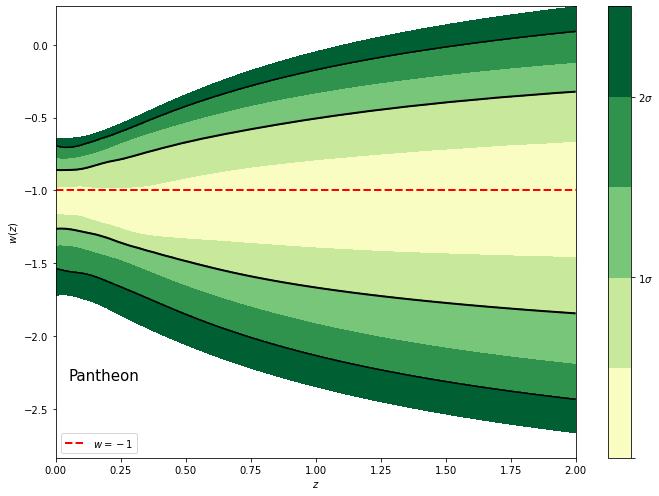

In [48]:
fig = plt.figure(figsize=(10, 7))

file_root = dir_name + 'waCDM_phy_Pantheon_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('YlGn')

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root)
k = np.linspace(0,2,100)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')

plt.tight_layout()

plt.legend(loc='lower left')
plt.text(0.05,-2.3, 'Pantheon', fontsize=15)
plt.savefig('cplEoS_pantheon.png')


  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

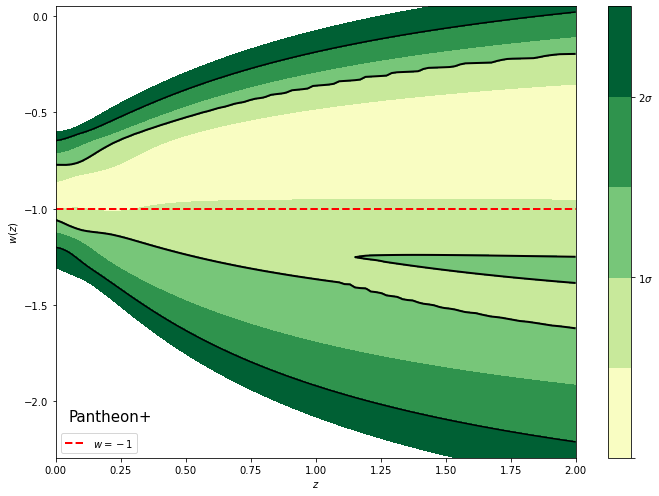

In [49]:
fig = plt.figure(figsize=(10, 7))

file_root = dir_name + 'waCDM_phy_PantheonPlus_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('YlGn')

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root)
k = np.linspace(0,2,100)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')

plt.tight_layout()

plt.legend(loc='lower left')
plt.text(0.05,-2.1, 'Pantheon+', fontsize=15)
plt.savefig('cplEoS_pantheon_plus.png')


  0%|          | 0/1409 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

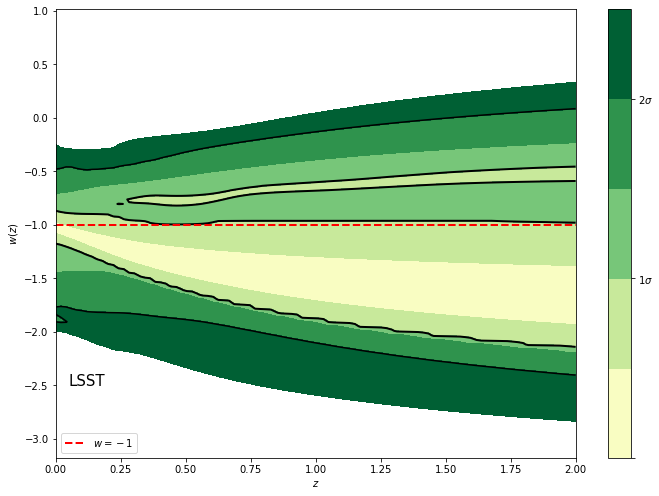

In [50]:
fig = plt.figure(figsize=(10, 7))
file_root = dir_name + 'waCDM_phy_SNlsstLarge_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('YlGn')

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root)
k = np.linspace(0,2,100)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')

plt.tight_layout()

plt.legend(loc='lower left')
plt.text(0.05,-2.5, 'LSST', fontsize=15)
plt.savefig('cplEoS_lsst.png')

## PEDE model

<Figure size 720x648 with 0 Axes>

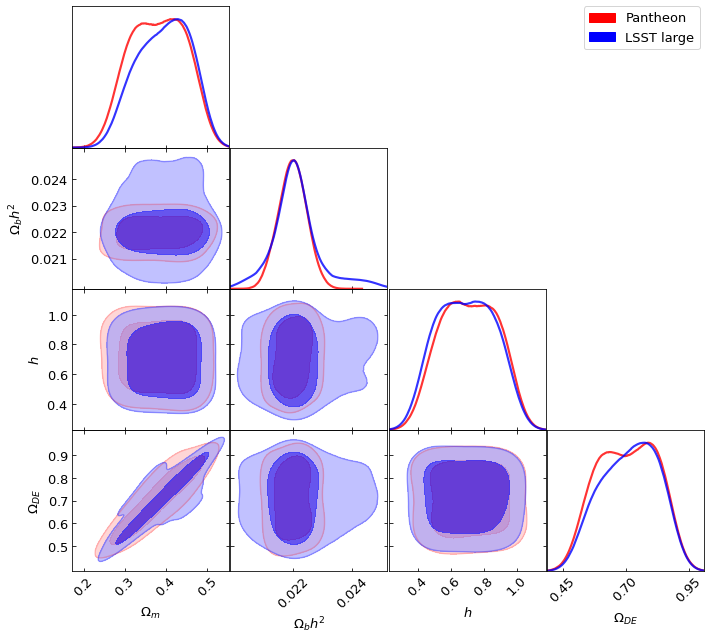

In [11]:
roots2 = [
          'PEDE_phy_Pantheon_nested_multi',
#           'waCDM_phy_SNlsstphoto_nested_multi',
          'PEDE_phy_SNlsstLarge_nested_multi',
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.6,
                                             'smooth_scale_1D': 0.6, 
                                             'ignore_rows': 0.1})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots2, ['Om','Obh2', 'h','Ode'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple', 'orange'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple', 'orange'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=[
                              'Pantheon',
                               'LSST large',
#                                'LSST spec'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.subplots[1,0].grid(True)
# g.subplots[2,0].grid(True)
# g.subplots[2,1].grid(True)
# g.subplots[3,0].grid(True)
# g.subplots[3,1].grid(True)
# g.subplots[3,2].grid(True)
# g.subplots[4,0].grid(True)
# g.subplots[4,1].grid(True)
# g.subplots[4,2].grid(True)
# g.subplots[4,3].grid(True)


# g.add_text('PEDE', x= -0.5, y=2.8, fontsize=13)

# plt.savefig("wacdm_LSST_corner.png", dpi=100)